### All needed imports to run notebook

In [208]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
import numpy as np

tf.enable_v2_behavior()

### Load MNIST dataset

In [227]:
# update this to have validation dataset as well
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
    try_gcs=True,
)

### Visualize the data

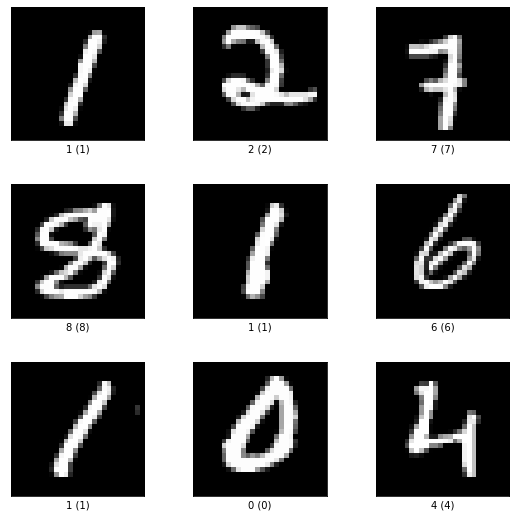

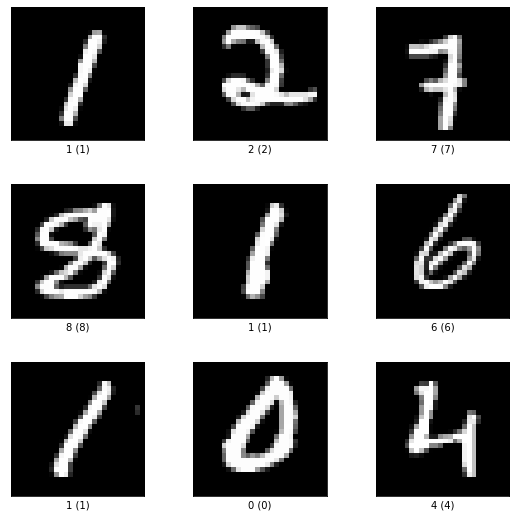

In [210]:
# using tf built in
tfds.show_examples(ds_train, ds_info)

In [222]:
# view arbitrary images in the dataset
def display_raw_img(xy):
    img = xy[0]
    # label = xy[1]
    img = np.array(img, dtype='float')
    pixels = img.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')

In [223]:
# it = ds_train.__iter__()
# first_element = it.get_next()
# display_raw_img(first_element)

### Build training pipeline

In [228]:
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label

# normalize images
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE
)
# cache images in memory before shuffling for better performance
ds_train = ds_train.cache()
# for true randomness, set shuffle buffer to full dataset size
# standard value is 1000 if whole dataset doesn't fit in memory
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
# get unique batch at each epoch
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

### Build evaluation pipeline

In [229]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE
)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

### Step 2: Create and train the model

In [226]:
# note, our objects are `one-hot` which means objects can belong to only one class
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [216]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [231]:
model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 1s 2ms/step - loss: 0.3609 - sparse_categorical_accuracy: 0.8996 - val_loss: 0.1917 - val_sparse_categorical_accuracy: 0.9448
Epoch 2/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1654 - sparse_categorical_accuracy: 0.9524 - val_loss: 0.1352 - val_sparse_categorical_accuracy: 0.9598
Epoch 3/6
469/469 [==============================] - 1s 2ms/step - loss: 0.1183 - sparse_categorical_accuracy: 0.9662 - val_loss: 0.1100 - val_sparse_categorical_accuracy: 0.9672
Epoch 4/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0919 - sparse_categorical_accuracy: 0.9739 - val_loss: 0.1029 - val_sparse_categorical_accuracy: 0.9687
Epoch 5/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0739 - sparse_categorical_accuracy: 0.9785 - val_loss: 0.0892 - val_sparse_categorical_accuracy: 0.9738
Epoch 6/6
469/469 [==============================] - 1s 2ms/step - loss: 0.0611 - sparse_categorical_accu

In [232]:
score = model.evaluate(ds_test, verbose=0)
print(f'Test loss: {score[0]}. Test accuracy: {score[1]}')

Test loss: 0.08122828602790833. Test accuracy: 0.9750999808311462


In [203]:
from tensorflow import keras

In [204]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [206]:
print(len(x_train))

60000


In [207]:
print(len(x_test))

10000
